In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# avoid out of ram error
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
%pip install opencv-python

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread(os.path.join('drive','MyDrive','diabetic_retinopathy_data','Data','train_images','000c1434d8d7.png'))

In [ ]:
img.shape

(2136, 3216, 3)

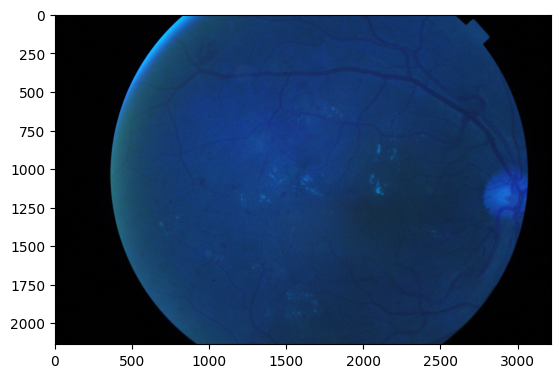

In [ ]:
plt.imshow(img)

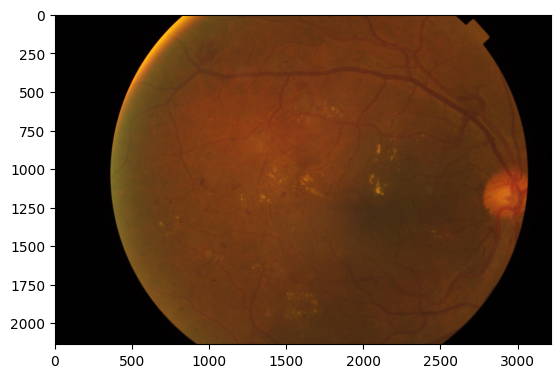

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Loading the data

In [ ]:
# building a data pipeline with this tf api

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('Data') # this is useless for now, but really usefull if you have different image folders
# -                                                          for each class

Found 3662 files belonging to 1 classes.


In [ ]:
%pip install pillow

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetic_retinopathy_data/Data/train.csv')

In [ ]:
len(df)

3662

In [ ]:
3662 * 0.8

2929.6000000000004

In [ ]:
int(3662 * 0.8)

2929

In [ ]:
Train = df.iloc[:2929]
Test = df.iloc[2929:]

In [ ]:
from PIL import Image

image_folder = '/content/drive/MyDrive/diabetic_retinopathy_data/Data'
x_train = []
y_train = []
image_counter = 1

for index, row in Train.iterrows():
    id_code = row['id_code']
    diagnosis = row['diagnosis']
    image_path = os.path.join(image_folder,'train_images', id_code + '.png')

    # Load and preprocess the image (resize, normalize, etc.)
    image = Image.open(image_path)

    # Perform preprocessing steps here as needed
    image = image.resize((224, 224))
    image = np.array(image) / 255.0  # Normalize pixel values


    print(f"image: {id_code} img num: {image_counter}")
    image_counter +=1

    # Append the image and its corresponding label to the lists
    x_train.append(image)
    y_train.append(diagnosis)

x_train = np.array(x_train)  # 'X_train' is now a NumPy array containing preprocessed images
y_train = np.array(y_train)



image: 000c1434d8d7 img num: 1
image: 001639a390f0 img num: 2
image: 0024cdab0c1e img num: 3
image: 002c21358ce6 img num: 4
image: 005b95c28852 img num: 5
image: 0083ee8054ee img num: 6
image: 0097f532ac9f img num: 7
image: 00a8624548a9 img num: 8
image: 00b74780d31d img num: 9
image: 00cb6555d108 img num: 10
image: 00cc2b75cddd img num: 11
image: 00e4ddff966a img num: 12
image: 00f6c1be5a33 img num: 13
image: 0104b032c141 img num: 14
image: 0124dffecf29 img num: 15
image: 0125fbd2e791 img num: 16
image: 012a242ac6ff img num: 17
image: 014508ccb9cb img num: 18
image: 0151781fe50b img num: 19
image: 0161338f53cc img num: 20
image: 0180bfa26c0b img num: 21
image: 0182152c50de img num: 22
image: 01b3aed3ed4c img num: 23
image: 01c7808d901d img num: 24
image: 01d9477b1171 img num: 25
image: 01eb826f6467 img num: 26
image: 01f7bb8be950 img num: 27
image: 0212dd31f623 img num: 28
image: 022f820027b8 img num: 29
image: 0231642cf1c2 img num: 30
image: 0232dfea7547 img num: 31
image: 02358b47ea

In [ ]:
len(x_train)

2929

In [ ]:
x_train.shape

(2929, 224, 224, 3)

In [ ]:
# do the same for test

In [ ]:
x_test = []
y_test = []
image_counter = 1

for index, row in Test.iterrows():
    id_code = row['id_code']
    diagnosis = row['diagnosis']
    image_path = os.path.join(image_folder,'train_images', id_code + '.png')

    # Load and preprocess the image (resize, normalize, etc.)
    image = Image.open(image_path)

    # Perform preprocessing steps here as needed
    image = image.resize((224, 224))
    image = np.array(image) / 255.0  # Normalize pixel values


    print(f"image: {id_code} img num: {image_counter}")
    image_counter +=1

    # Append the image and its corresponding label to the lists
    x_test.append(image)
    y_test.append(diagnosis)

x_test = np.array(x_test)  # 'x_test' is now a NumPy array containing preprocessed images
y_test = np.array(y_test)

image: cb28adab4e8a img num: 1
image: cb2f3c5d71a7 img num: 2
image: cb39761f0712 img num: 3
image: cb547e723a16 img num: 4
image: cb602182cde3 img num: 5
image: cb68fce07789 img num: 6
image: cb75210abebe img num: 7
image: cbc23af521f3 img num: 8
image: cbc2e57447c2 img num: 9
image: cbd0870aa933 img num: 10
image: cbe633765ea7 img num: 11
image: cbf0394039f8 img num: 12
image: cc12453ea915 img num: 13
image: cc1eebed9276 img num: 14
image: cc3d2e961768 img num: 15
image: cc671a73e1cb img num: 16
image: cc839823755b img num: 17
image: cc9270f06b65 img num: 18
image: cc964bf04dbc img num: 19
image: cca626a0e19a img num: 20
image: ccd34029493d img num: 21
image: ccd6dcb2f568 img num: 22
image: ccea49708830 img num: 23
image: cd01672507c9 img num: 24
image: cd01f4f83336 img num: 25
image: cd1c98ec48b1 img num: 26
image: cd29c88c9e36 img num: 27
image: cd314653a4d8 img num: 28
image: cd3fd04d72f5 img num: 29
image: cd45bfa07d41 img num: 30
image: cd48cfab4e44 img num: 31
image: cd4e7f9fa1

In [ ]:
len(y_test)

733

In [ ]:
x_test.shape

(733, 224, 224, 3)

In [ ]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation ='relu',input_shape = (224,224,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # desnse
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')




])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=50)

Epoch 1/50
92/92 [==============================] - 1s 12ms/step - loss: 0.1471 - accuracy: 0.9549
Epoch 2/50
92/92 [==============================] - 1s 12ms/step - loss: 0.1337 - accuracy: 0.9611
Epoch 3/50
92/92 [==============================] - 1s 12ms/step - loss: 0.1122 - accuracy: 0.9693
Epoch 4/50
92/92 [==============================] - 1s 11ms/step - loss: 0.0847 - accuracy: 0.9758
Epoch 5/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0910 - accuracy: 0.9795
Epoch 6/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0714 - accuracy: 0.9795
Epoch 7/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0673 - accuracy: 0.9833
Epoch 8/50
92/92 [==============================] - 1s 11ms/step - loss: 0.0668 - accuracy: 0.9850
Epoch 9/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0607 - accuracy: 0.9846
Epoch 10/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0623 - accuracy: 0.9802
Epoch 11/

In [ ]:
cnn.evaluate(x_test,y_test)

23/23 [==============================] - 0s 13ms/step - loss: 1.5387 - accuracy: 0.7381


[1.5387108325958252, 0.7380627393722534]

In [ ]:
test_image =  cv2.imread(os.path.join('drive','MyDrive','diabetic_retinopathy_data','Data','train_images','000c1434d8d7.png'))

In [ ]:
y_pred = cnn.predict(x_test)

23/23 [==============================] - 0s 7ms/step


In [ ]:
y_pred

array([[1.00000000e+00, 1.01937399e-21, 1.33006695e-14, ...,
        3.53569067e-23, 5.01625491e-20, 9.85369373e-21],
       [9.99999762e-01, 2.86406618e-07, 9.64344338e-09, ...,
        9.21590508e-17, 1.13291906e-15, 1.95370250e-13],
       [9.06158388e-01, 1.13047753e-03, 9.18764025e-02, ...,
        2.67793432e-09, 1.37313960e-09, 5.79321231e-08],
       ...,
       [2.98785949e-07, 6.58295949e-06, 9.70298827e-01, ...,
        3.46067771e-12, 5.99258598e-09, 1.16547071e-13],
       [9.99999285e-01, 1.36993208e-08, 4.74645612e-09, ...,
        7.10766488e-14, 6.93389226e-12, 8.62866889e-10],
       [4.09689907e-04, 4.05290127e-01, 5.93892813e-01, ...,
        9.92663677e-12, 9.46802151e-11, 3.70472791e-10]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 1, 2]

In [ ]:
diagnosis = ['0','1','2','3','4']


In [ ]:
diagnosis[y_classes[4]]

'2'

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       387
           1       0.34      0.49      0.41        61
           2       0.61      0.65      0.63       185
           3       0.36      0.23      0.28        35
           4       0.38      0.15      0.22        65

    accuracy                           0.74       733
   macro avg       0.53      0.50      0.50       733
weighted avg       0.73      0.74      0.73       733



# test


In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/703_right.jpeg')

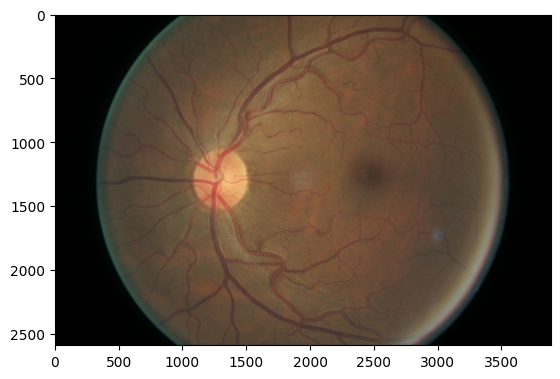

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

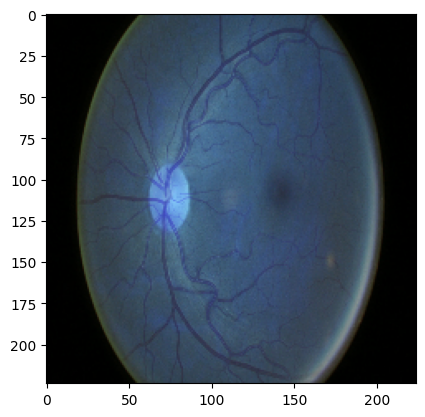

In [ ]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0)

array([[[[1.        , 2.        , 0.        ],
         [1.        , 1.        , 1.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[1.        , 2.        , 0.        ],
         [1.        , 1.        , 1.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[1.        , 1.        , 1.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
np.expand_dims(resize,0).shape

(1, 224, 224, 3)

In [ ]:
yhat = cnn.predict(np.expand_dims(resize / 255,0))

1/1 [==============================] - 0s 79ms/step


In [ ]:
np.argmax(yhat)

2

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
cnn.save(os.path.join('models','DR_classification'))

In [ ]:
# cnn.save(os.path.join('models','DR_classification.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%cd /content/models

/content/models


In [ ]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/DR_classification/ (stored 0%)
  adding: content/models/DR_classification/saved_model.pb (deflated 87%)
  adding: content/models/DR_classification/fingerprint.pb (stored 0%)
  adding: content/models/DR_classification/assets/ (stored 0%)
  adding: content/models/DR_classification/variables/ (stored 0%)
  adding: content/models/DR_classification/variables/variables.index (deflated 62%)
  adding: content/models/DR_classification/variables/variables.data-00000-of-00001 (deflated 29%)
  adding: content/models/DR_classification/keras_metadata.pb (deflated 90%)
